In [1]:
from project_handlers.project_info import ProjectInfo
from project_handlers.project_data_handler import ProjectDataHandler
from project_handlers.project_model_handler import ProjectModelHandler
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
from utils.plotting import plt_relation
from utils.evaluation import get_evaluation_df, get_results
import pandas as pd
import torch
import warnings
from torchvision import transforms
from lib.models.rppg_transforms import RollingNormalize, RPPGDetrend

In [2]:
dataset_names = ['small']
model_names = ['ica']

In [3]:
info = ProjectInfo()
t_size = info.t_size
data_root = info.data_root
model_root = info.model_root
sampling_rate = info.sampling_rate

In [4]:
data_handler = ProjectDataHandler(data_root)
model_handler = ProjectModelHandler(model_root, sampling_rate)

In [5]:
rppg_transform = transforms.Compose([RollingNormalize(100), RPPGDetrend()])

In [6]:
warnings.filterwarnings("ignore")

# ICA

## Window Size

In [7]:
for i in range(10):
    tf = transforms.Compose([RollingNormalize(10*(i+1))])
    results = get_results(info, data_handler, model_handler, ['grid1'], ['ica_avg'], transform=tf)
    df = get_evaluation_df(results)
    print(df)

                     mean       std       mse       mae
grid1 & ica_avg -0.027312  0.075254  0.006409  0.066579
                     mean       std       mse       mae
grid1 & ica_avg -0.026059  0.046411  0.002833  0.039871
                    mean       std       mse       mae
grid1 & ica_avg -0.27807  0.825467  0.758719  0.317251
                     mean       std       mse       mae
grid1 & ica_avg -0.561387  0.907933  1.139498  0.571325
                     mean       std       mse       mae
grid1 & ica_avg -0.573179  0.877328  1.098238  0.579581
                     mean       std      mse       mae
grid1 & ica_avg -0.539362  0.871045  1.04963  0.577187
                     mean       std       mse       mae
grid1 & ica_avg -0.882061  1.112745  2.016234  0.890967
                     mean       std       mse       mae
grid1 & ica_avg -0.840634  1.175795  2.089159  0.896281
                     mean       std       mse       mae
grid1 & ica_avg -0.851802  1.131798  2.006532  0.892

## Advanced Detrend

In [8]:
results = get_results(info, data_handler, model_handler, ['grid1'], ['ica_avg'])
df = get_evaluation_df(results)
print(df)

                     mean      std    mse       mae
grid1 & ica_avg -0.583333  0.96681  1.275  0.583333


# Multi-region

In [9]:
results = get_results(info, data_handler, model_handler, ['grid25', 'mesh'], ['ica_avg', 'ica_med'])
df = get_evaluation_df(results)
print(df)

                          mean           std           mse           mae
grid25 & ica_avg -7.947286e-09  5.271633e-08  2.842171e-15  3.973643e-08
grid25 & ica_med -7.947286e-09  5.271633e-08  2.842171e-15  3.973643e-08
mesh & ica_avg   -2.582868e-08  5.030230e-08  3.197442e-15  4.967054e-08
mesh & ica_med   -2.582868e-08  5.030230e-08  3.197442e-15  4.967054e-08


# Neural Networks

## NN

In [10]:
results = get_results(info, data_handler, model_handler, ['mesh'], ['nn'])
df = get_evaluation_df(results)
print(df)

                   mean           std           mse           mae
mesh & nn -2.582868e-08  5.030230e-08  3.197442e-15  4.967054e-08


# Resnet + RNN

In [11]:
results = get_results(info, data_handler, model_handler, ['mesh'], ['resnet', 'rnn', 'tresnet', 'trnn'])
df = get_evaluation_df(results)
print(df)

                   mean       std       mse       mae
mesh & resnet  0.065547  0.173508  0.034401  0.143485
mesh & rnn     0.044968  0.748756  0.562658  0.668171


## Resnet + RNN (with detrend)

In [12]:
results = get_results(info, data_handler, model_handler, ['mesh'], ['tresnet', 'trnn'])
df = get_evaluation_df(results)
print(df)

TypeError: 'NoneType' object is not callable

   Prediction  Truth
0  198.019791  190.0
1   99.009895   90.0
2   39.603962   90.0
3   39.603962  150.0
4   99.009895   90.0
5  198.019791  200.0
6   79.207924   80.0
7   99.009895  100.0
8  237.623764  230.0
9  158.415848  150.0


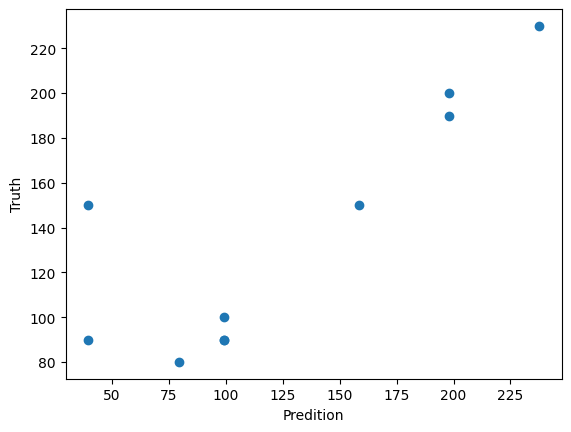

In [ ]:
for dataset_name, model_name, yhat, y in results:
    y *= 60
    yhat *= 60
    df = pd.DataFrame({'Prediction' : yhat, 'Truth' : y})
    print(df)
    plt_relation(yhat, y)
    plt.show()

In [ ]:
warnings.filterwarnings("always")